In [1]:
import cv2, os
from PIL import Image
import numpy as np
from skimage import io, img_as_float
from skimage.filters import gaussian

# Converting Tiff images to JPG images

### Converting original images 

In [3]:
#Converting tiff imgages to jpg images

tiff_path = r"C:\Users\User\Python Works\Cancer Detection\images"
jpg_path = r"C:\Users\User\Python Works\Cancer Detection\jpg_images"
for infile in os.listdir(tiff_path):
    print ("file : " + infile)
    read = cv2.imread(os.path.join(tiff_path, infile))
    outfile = infile.split('.')[0] + '.jpg'
    cv2.imwrite(os.path.join(jpg_path, outfile),read,[int(cv2.IMWRITE_JPEG_QUALITY), 200])

file : Case_1-01.tif
file : Case_1-02.tif
file : Case_1-03.tif
file : Case_1-04.tif
file : Case_1-05.tif
file : Case_1-06.tif
file : Case_1-07.tif
file : Case_1-08.tif
file : Case_10-01.tif
file : Case_10-02.tif
file : Case_10-03.tif
file : Case_10-04.tif
file : Case_10-05.tif
file : Case_10-06.tif
file : Case_10-07.tif
file : Case_10-08.tif
file : Case_10-09.tif
file : Case_10-10.tif
file : Case_11-07.tif
file : Case_11-09.tif
file : Case_11-10.tif
file : Case_11-11.tif
file : Case_11-12.tif
file : Case_11-13.tif
file : Case_11-15.tif
file : Case_12-01.tif
file : Case_12-02.tif
file : Case_12-03.tif
file : Case_12-04.tif
file : Case_12-05.tif
file : Case_12-06.tif
file : Case_12-07.tif
file : Case_12-08.tif
file : Case_12-09.tif
file : Case_12-10.tif
file : Case_12-11.tif
file : Case_12-12.tif
file : Case_13-01.tif
file : Case_13-02.tif
file : Case_13-03.tif
file : Case_13-04.tif
file : Case_13-05.tif
file : Case_13-06.tif
file : Case_13-07.tif
file : Case_13-10.tif
file : Case_13-11.

### Converting Ground tiff images to jpg ground images

In [5]:
ground_tiff_path = r"C:\Users\User\Python Works\Cancer Detection\groundTruth_display"
ground_jpg_path = r"C:\Users\User\Python Works\Cancer Detection\jpg_groundtruth_display"
for infile in os.listdir(ground_tiff_path):
    print ("file : " + infile)
    read = cv2.imread(os.path.join(ground_tiff_path, infile))
    outfile = infile.split('.')[0] + '.jpg'
    cv2.imwrite(os.path.join(ground_jpg_path, outfile),read,[int(cv2.IMWRITE_JPEG_QUALITY), 200])
    print("New Image saved: "+outfile)

file : Case_1-01.png
New Image saved: Case_1-01.jpg
file : Case_1-02.png
New Image saved: Case_1-02.jpg
file : Case_1-03.png
New Image saved: Case_1-03.jpg
file : Case_1-04.png
New Image saved: Case_1-04.jpg
file : Case_1-05.png
New Image saved: Case_1-05.jpg
file : Case_1-06.png
New Image saved: Case_1-06.jpg
file : Case_1-07.png
New Image saved: Case_1-07.jpg
file : Case_1-08.png
New Image saved: Case_1-08.jpg
file : Case_10-01.png
New Image saved: Case_10-01.jpg
file : Case_10-02.png
New Image saved: Case_10-02.jpg
file : Case_10-03.png
New Image saved: Case_10-03.jpg
file : Case_10-04.png
New Image saved: Case_10-04.jpg
file : Case_10-05.png
New Image saved: Case_10-05.jpg
file : Case_10-06.png
New Image saved: Case_10-06.jpg
file : Case_10-07.png
New Image saved: Case_10-07.jpg
file : Case_10-08.png
New Image saved: Case_10-08.jpg
file : Case_10-09.png
New Image saved: Case_10-09.jpg
file : Case_10-10.png
New Image saved: Case_10-10.jpg
file : Case_11-07.png
New Image saved: Case_

New Image saved: Case_9-05.jpg
file : Case_9-07.png
New Image saved: Case_9-07.jpg
file : Case_9-08.png
New Image saved: Case_9-08.jpg
file : Case_9-10.png
New Image saved: Case_9-10.jpg


# Gaussain Blur Filtering 

In [9]:
# Testing on one image
test_img = r"C:\Users\User\Python Works\Cancer Detection\jpg_images\Case_1-01.jpg"
img = img_as_float(io.imread(test_img, as_gray=True))

In [10]:
# Applying gaussian Blur
gaussian_using_cv2 = cv2.GaussianBlur(img, (3,3), 0, borderType=cv2.BORDER_CONSTANT)

In [11]:
# Comparing images side by side
cv2.imshow("Original", img)
cv2.imshow("CV2 filter", gaussian_using_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

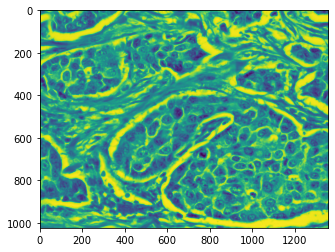

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#imgplot = plt.imshow(img)
imgplot2 = plt.imshow(gaussian_using_cv2)
plt.show()

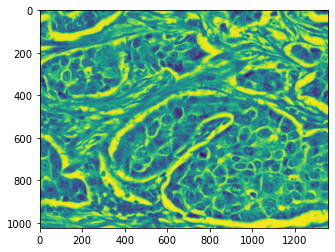

In [13]:
%matplotlib inline

imgplot = plt.imshow(img)
plt.show()

# Bilateral Denose Filtering

In [15]:
from skimage.restoration import denoise_bilateral
bilateral_using_skimg = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=20, multichannel=False)

C:\Users\User\AppData\Local\Temp\ipykernel_8516\1071627291.py:2: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  bilateral_using_skimg = denoise_bilateral(img, sigma_color=0.05, sigma_spatial=20, multichannel=False)


In [16]:
cv2.imshow("Original", img)
cv2.imshow("Bilateral Filerting", bilateral_using_skimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

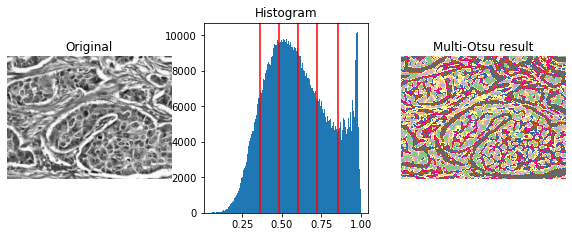

In [20]:
from skimage import data, io, img_as_ubyte
from skimage.filters import threshold_multiotsu

# Read an image


# Apply multi-Otsu threshold 
thresholds = threshold_multiotsu(img, classes=6)

# Digitize (segment) original image into multiple classes.
#np.digitize assign values 0, 1, 2, 3, ... to pixels in each class.
regions = np.digitize(img, bins=thresholds)
output = img_as_ubyte(regions)  #Convert 64 bit integer values to uint8

plt.imsave("Segmentation/Otsu_Segmented.jpg", output)


#Let us look at the input image, thresholds on thehistogram and final segmented image
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(img.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()